<a href="https://colab.research.google.com/github/Chromatina/su-mt4007/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Task 1

In [5]:
df = pd.read_csv("covtype.csv")
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
df.describebe()

# Task 2

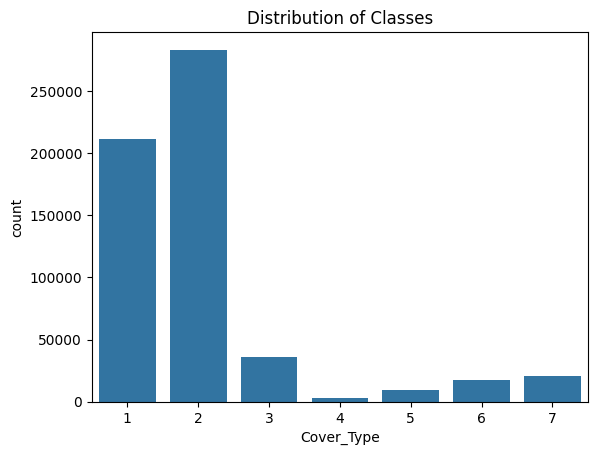

In [8]:
sns.countplot(x="Cover_Type", data=df)
plt.title("Distribution of Classes")
plt.show()

From the plot above we see that class 1 and 2 represent the majority of the data, in this case class imbalance is an issue since the network could simply ignore the other classes and only make predictions on the first two. Since the first two classes represent about 85% of the data (see print-out below), the model would be correct 85% of the time (if it correctly classifies these two classes of course) but it would be terrible at classifiying new data into the other five classes. To summarise, the model would ignore the majority of our classes and still make good predictions, although faulty predictions. **FRÅGA OM DET JAG SKRIVIT!!!**

In [9]:
class_proportions = df["Cover_Type"].value_counts(normalize=True)
print("Class 1 and 2 represent", round((class_proportions[1] + class_proportions[2]) * 100, 1), "% of the data.")

Class 1 and 2 represent 85.2 % of the data.


# Task 3

In [11]:
features = df.drop("Cover_Type", axis=1)
mean = np.mean(features, axis=0)
std = np.std(features, axis=0)
standardized_features = (features - mean) / std
standardized_df = standardized_features.assign(Cover_Type=df["Cover_Type"])
standardized_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,5
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,5
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,-2.012130,-0.023740,0.787408,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,-0.863386,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581008,-2.029988,-0.032675,0.653865,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,-0.857345,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581009,-2.047847,0.029873,0.386780,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,-0.850548,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581010,-2.054990,0.128163,0.119694,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,-0.842997,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3


In [ ]:
mean_std_list = []
for feature in df:
    tot_sum = 0
    square_vals = 0
    for val in df[feature]:
        tot_sum += val
    mean = tot_sum / df[feature].count()
    for val in df[feature]:
        square_vals += (val - mean)**2
    std = (square_vals/(df[feature].count()))**(1/2)
    mean_std_list.append((feature, mean, std))

mean_std_list

#for val in df[feature]:
#        standardized_df[feature] = (val - mean)/std

# Task 4

Standardization is important because if some our inputs are significantly larger than the rest, then multiplying them by the weights will result in much larger outputs and thus uneven performance of our model. The weights for the larger inputs (features) will affect the loss much more than the weights for the inputs with much smaller scale. We should always standardize our dataset after splitting the data. This is because if we standardize the data before splitting it, then the training data will have "seen" the mean and standard deviation of the whole dataset which includes the testing and validation sets. The testing set should be completely new and unseen to the training set and if this is not the case, it could lead to the models performance seeming better than it actually is.

# Task 5

In [16]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

# We use stratify=y to ensure the imbalanced classes are distributed evenly
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

scaler = StandardScaler()

# We "fit" only on the training data to learn the mean and std dev
X_train_scaled = scaler.fit_transform(X_train)

# We "transform" validation and test sets using the training parameters
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
#X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)
#X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

#print(f"Training set mean: {X_train_scaled.values.mean():.5f}") # Should be ~0
#print(f"Training shape: {X_train_scaled.shape}")
#print(f"Validation shape: {X_val_scaled.shape}")
#print(f"Testing shape: {X_test_scaled.shape}")

# Task 6

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Prepare the labels (subtract 1 for 0-6 indexing)
y_train_np = y_train.values - 1
y_val_np = y_val.values - 1

# Convert directly to PyTorch Tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.long)

X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_np, dtype=torch.long)

# Create Datasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=1024)

In [18]:
class CovertypeNet(nn.Module):
    def __init__(self, input_size):
        super(CovertypeNet, self).__init__()
        # Define the layers
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 7) # 7 classes (0-6)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Define the data flow
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x) # No Softmax here because CrossEntropyLoss applies it
        return x

# Initialize the model
model = CovertypeNet(input_size=X_train_scaled.shape[1])

In [19]:
# Calculate the frequency of each class in the training set
class_counts = np.bincount(y_train_np)
weights = 1.0 / class_counts
weights = torch.tensor(weights, dtype=torch.float32)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch_X, batch_y in train_loader:
        # 1. Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # 2. Backward pass (The magic part)
        optimizer.zero_grad() # Clear previous gradients
        loss.backward()       # Compute new gradients
        optimizer.step()      # Update weights

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

Epoch 1/10, Loss: 0.8989
Epoch 2/10, Loss: 0.6271
Epoch 3/10, Loss: 0.5750
Epoch 4/10, Loss: 0.5473
Epoch 5/10, Loss: 0.5253
Epoch 6/10, Loss: 0.5087
Epoch 7/10, Loss: 0.4917
Epoch 8/10, Loss: 0.4795
Epoch 9/10, Loss: 0.4678
Epoch 10/10, Loss: 0.4580


In [20]:
# Lists to store metrics for plotting
train_losses = []
val_losses = []

for epoch in range(epochs):
    # --- TRAINING PHASE ---
    model.train()
    running_train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # --- VALIDATION PHASE ---
    model.eval() # Set model to evaluation mode
    running_val_loss = 0.0
    with torch.no_grad(): # Disable gradient calculation (saves memory/time)
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            running_val_loss += loss.item()

    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

Epoch [1/10] | Train Loss: 0.4491 | Val Loss: 0.4473
Epoch [2/10] | Train Loss: 0.4418 | Val Loss: 0.4393
Epoch [3/10] | Train Loss: 0.4337 | Val Loss: 0.4367
Epoch [4/10] | Train Loss: 0.4290 | Val Loss: 0.4258
Epoch [5/10] | Train Loss: 0.4227 | Val Loss: 0.4187
Epoch [6/10] | Train Loss: 0.4150 | Val Loss: 0.4216
Epoch [7/10] | Train Loss: 0.4114 | Val Loss: 0.4071
Epoch [8/10] | Train Loss: 0.4056 | Val Loss: 0.4070
Epoch [9/10] | Train Loss: 0.4015 | Val Loss: 0.4058
Epoch [10/10] | Train Loss: 0.3950 | Val Loss: 0.3965


# Task 7

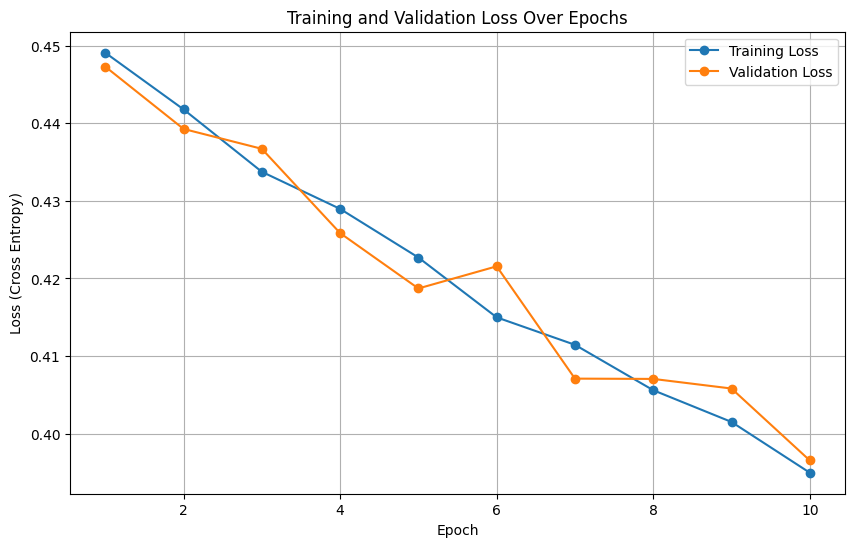

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', marker='o')

plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Cross Entropy)')
plt.legend()
plt.grid(True)
plt.show()